In [3]:
import numpy as np # linear algebra import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys
import sklearn

# The Challenge
### The goal of this algorithm is to interpret hisorical accident data and predict the severity of accidents that may occur in the area based on the attributes that are heavily corralated. This information can be used to suggest avoiding areas during route planning and could allow the insurance company to make a preliminary estimates based on the accident location.

## Data Visualization
#### Reads in accident data then processes it to produce a bar graph measuring accidents by state. This would allow the analyzer to visualize the data to see the amount of accidents that occur in each state, compared to other states.

Text(0, 0.5, 'Number of accidents')

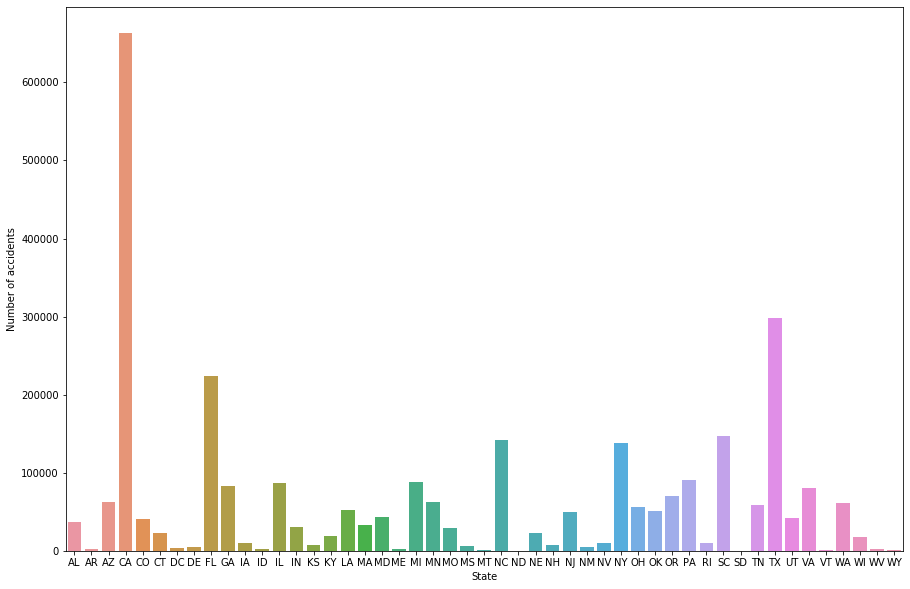

In [5]:
path = os.getcwd()

data_df = pd.read_csv((path+'/US_Accidents_Dec19.csv'),index_col=False)
data_df = data_df.drop(columns = ['Start_Lat','Start_Lng','End_Lat','End_Lng','Source','TMC'])
#df = data_df.drop(['ID'],axis = 1)
data_df.head(5)
[row,col] = data_df.shape
state_count = ((data_df.groupby('State').count())['ID'])
plt.figure(figsize=(15,10))
ax = sns.barplot(state_count.index, state_count.values)
plt.ylabel('Number of accidents')

### Figure 1 
##### California and Texas are states with most number of accidents 

Text(0, 0.5, 'Percentage of accidents')

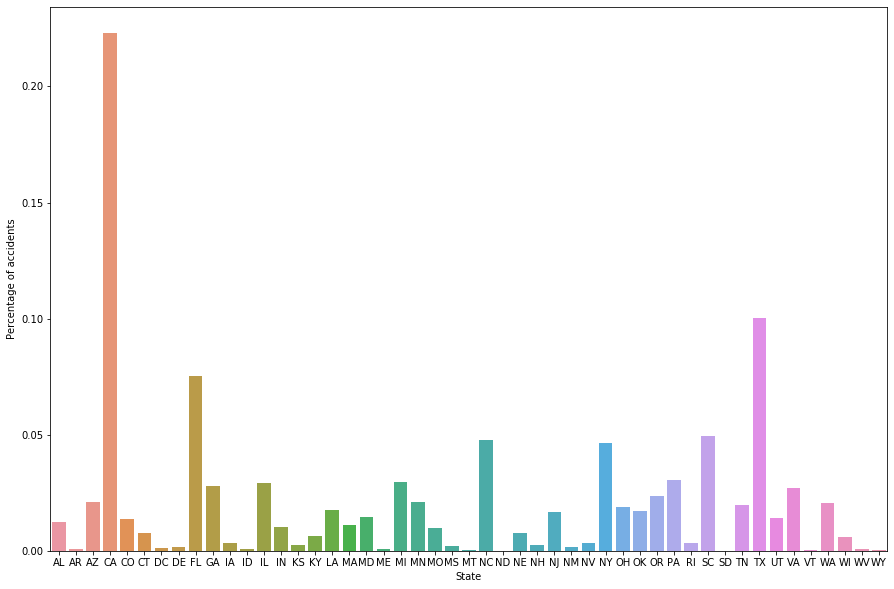

In [6]:
#df = data_df.drop(['ID'],axis = 1)
data_df.head(5)
[row,col] = data_df.shape
state_count = ((data_df.groupby('State').count())['ID'])
plt.figure(figsize=(15,10))
ax = sns.barplot(state_count.index, state_count.values/row)
plt.ylabel('Percentage of accidents')

### Figure 2
###### Over 20% of all accident occurs in the state of california, and over 10% of accidients occur in Texas

Text(0, 0.5, 'Ratio of accident to number of people')

<Figure size 1080x720 with 0 Axes>

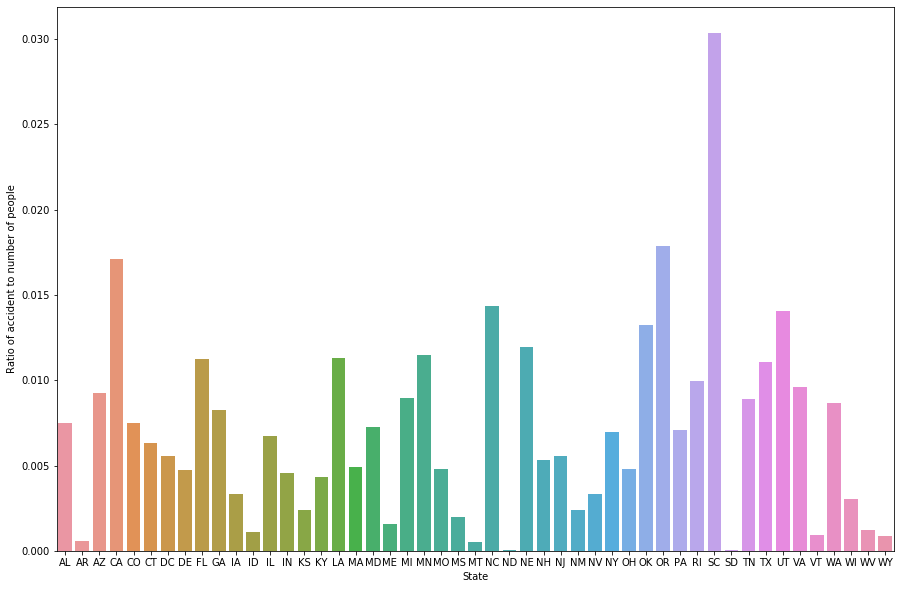

In [8]:
state_population_df = pd.read_csv((path+'/state_population_copy.csv'),index_col= 'Postal')
plt.figure(figsize=(15,10))
state_population = state_population_df.drop(index = ['AR','IA'])
state_population_df = state_population_df.sort_values(by = 'Postal')
state_population_df['count'] = state_count
plt.figure(figsize=(15,10))
state_population_df = state_population_df.dropna()
state_population_df.head()

ax = sns.barplot(state_count.index, 
                 state_population_df['count']/state_population_df['Population'])
plt.ylabel('Ratio of accident to number of people')

### Figure 3 
##### To get a better understanding of the frequency of accidents relative to population (weight), we divide the number of accidents by population. This shows that South Dakota has the worst number of accidents compared to their population.

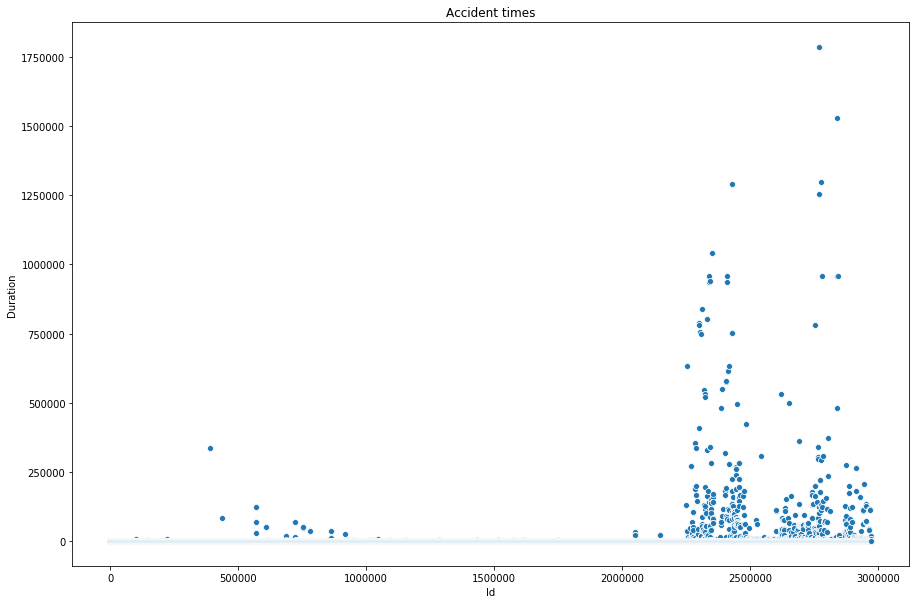

In [9]:
plt.figure(figsize=(15,10))
test = (pd.to_datetime(data_df['End_Time']) - pd.to_datetime(data_df['Start_Time']))/np.timedelta64(1,'m')
sns.scatterplot(x = data_df.index,y = test)
plt.xlabel('Id')
plt.ylabel('Duration')
plt.title('Accident times')
new_data_df = data_df.drop(columns = ['End_Time','Start_Time'])

### Figure 4
##### Plotting the data to visualize the duration of each accident 

# Feature generation
### In order to further understand which attributes effect the severity of an accident the most, we process the data to find the attributes with the strongest correlation. This leaves us with fators that actually play a part in accident severity.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('Street','Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp','Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(new_data_df[c].values)) 
    new_data_df[c] = lbl.transform(list(new_data_df[c].values))

In [11]:

incode = LabelEncoder()
new_data_df['Weather_Condition'] = incode.fit_transform(list(new_data_df['Weather_Condition'].values))


In [12]:
plt.figure(figsize = (40,40))

coor_value = ((new_data_df.corr()['Severity']).abs())

<Figure size 2880x2880 with 0 Axes>

##### To determine the which attributes effect severity, we encode all categorical attributes and calculate the corralation rates.

In [13]:
coor_value.sort_values()

Roundabout               0.003843
Bump                     0.005455
Visibility(mi)           0.006136
No_Exit                  0.006709
Traffic_Calming          0.006786
Airport_Code             0.007700
Give_Way                 0.007847
City                     0.008162
Timezone                 0.013703
Precipitation(in)        0.016632
Pressure(in)             0.018289
Humidity(%)              0.023188
Railway                  0.023666
Number                   0.023979
Temperature(F)           0.029132
Wind_Speed(mph)          0.030343
Weather_Condition        0.035218
State                    0.037516
Amenity                  0.049221
Station                  0.052094
Stop                     0.055394
Zipcode                  0.057871
Weather_Timestamp        0.058940
Junction                 0.063437
Sunrise_Sunset           0.068988
County                   0.074298
Civil_Twilight           0.076560
Wind_Chill(F)            0.079993
Nautical_Twilight        0.083870
Astronomical_T

In [14]:
X_data = data_df[(['Crossing','Side', 'Wind_Chill(F)','Astronomical_Twilight','Traffic_Signal','Severity']) ]
X_data = X_data.dropna()
y_label = X_data['Severity']
X_data = X_data.drop(columns = 'Severity',axis = 1)
#X_data.shape
#y_label.shape

##### Cherry picking the best corralated attributes that also have relavence

In [15]:
from sklearn.model_selection import train_test_split
cols = ('Crossing','Side','Astronomical_Twilight','Traffic_Signal')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X_data[c].values)) 
    X_data[c] = lbl.transform(list(X_data[c].values))
X_data = X_data.dropna()

X_train, X_Valid, Y_train, Y_Valid=train_test_split(X_data,y_label, test_size=0.15, random_state=4)

##### Create training and actual sets by splitting the given data to create the model that will be used to predict severity

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, bootstrap = True )
model.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
from sklearn import metrics
prediction = model.predict(X_Valid)
metrics.accuracy_score(prediction, Y_Valid)

0.6985789257843842

In [18]:
from sklearn.ensemble import AdaBoostClassifier 
model_ada = AdaBoostClassifier(n_estimators=50)
model_ada.fit(X_train,Y_train)
prediction = model_ada.predict(X_Valid)
metrics.accuracy_score(prediction, Y_Valid)

0.6982520371107795

##### Testing two different models to see if any model provided any better accuracy than the other

In [19]:
type(y_label)

pandas.core.series.Series

In [20]:
final_data = X_train
final_data['label'] = y_label
final_data= final_data.reset_index(drop = True)

C:\Users\Max\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
final_data.head()
final_data.to_csv((path+'Final_data.csv'))

##### Exporting all model data to a .csv file

### Conclusion
##### Upon finishing our data analysis and processing, we found that both the RandomForest model and AdaBoost model performed well, with neither being superior.